### Regularization Model (Ridge, Lasso, Elastic-Net)

The Whole of the Objective/ Goal of the Regularization term is to minimize the Cost function in order to for the model to better fit the data

In [1]:
#Importing the Required Labaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading The Dataset
cars = pd.read_csv("C:/Users/Akaash/Downloads/Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
#Checking Dtype of Columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


Inference: No Object Dtype Present, Also No NA Values

In [4]:
#Corr()
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [5]:
# input 
X = pd.concat([cars.iloc[:,0],cars.iloc[:,2:]],axis=1)
#output 
Y = cars.iloc[:,1] 

In [6]:
#Train Test split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=1)
#Getting the Shape of the Split
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((60, 4), (60,), (21, 4), (21,))

#### Normal Linear Regression Model

In [7]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

Mean squared Error on test set :  29.423942978598998
  Columns  Coefficient Estimate
0      HP             -0.208509
1     VOL             -0.314293
2      SP              0.346066
3      WT              0.441622


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

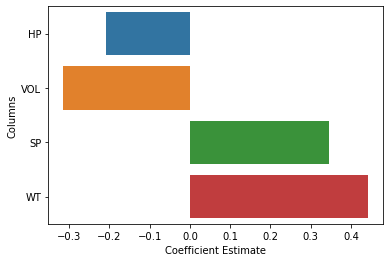

In [8]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

Inference: By Applying the Normal Linear Regression we got MSE 29.42

#### Ridge Regression
--> Applys L2 Regularization

--> Will Minimize the the Coefficients but wont make them Zero

--> Handled Multicollinearlity

In [9]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient)

29.438652408849066
  Columns  Coefficient Estimate
0      HP             -0.208476
1     VOL             -0.287482
2      SP              0.345742
3      WT              0.361718


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

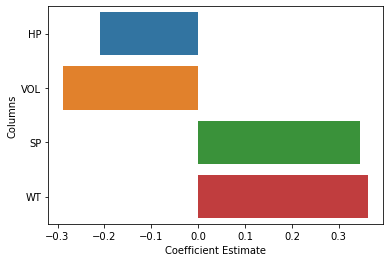

In [10]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

Inference: By Applying the Ridge Regression it Seems it Handle the Multi collinearity Effect

#### Lasso regression
--> Apply L1 Regularization

--> Makes the Cofficients Zero of the Leasts Important Features

--> Can be Used For Feature Selection

In [11]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 0.1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 29.582087283025867
  Columns  Coefficient Estimate
0      HP             -0.206303
1     VOL             -0.165821
2      SP              0.335771
3      WT              0.000000


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

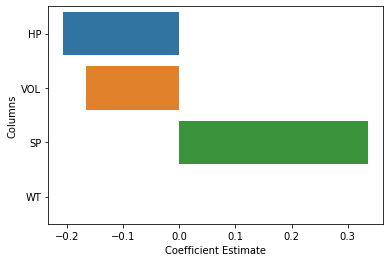

In [12]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

Inference: By Applying the lasso Regression, it made the least important Columns Coefficent to Zero, "WT" was Insignificant so lasso made it Zero

#### Elastic Net
--> when r / l1_ratio = 0 then Ridge

--> when r / l1_ratio = 1 then Lasso

In [13]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = 0.01,l1_ratio=0.5) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 29.459068857461254


,Columns,Coefficient Estimate
0,HP,-0.208647
1,VOL,-0.253894
2,SP,0.346222
3,WT,0.261682


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

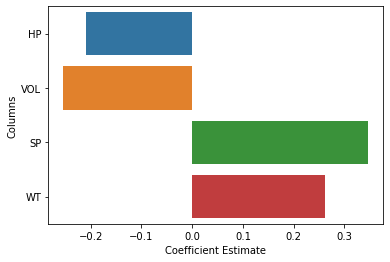

In [14]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff)

Inference: In Elastic Net Did a combination of Both 